## News Tweet Sentiment Analysis Observations (100 most recent tweets as of 10/1/2018)

(Twitter handles used in analysis: @nytimes, @CNNbrk, @FoxNews, @BBCBreaking, @CBSNews)

Shown below are the results of the third time running the sentiment analysis within a 24-hour period. 

* After running the analysis three separate times within a 24-hour time periond, the BBC consistently had the most negative score for sentiment analysis. This may be due to the specific handle selected for BBC (breaking news) and an interesting comparison would be BBCBreaking vs. other BBC handles (BBCWorld).


* On the third and final analysis run, Fox News went from a negative score the prior two times to a positive score. The other news outlets didn't fluctuate as much; this might be due to a specific topic Fox News is positively tweeting  about at time of the analysis that other news outlets are not positively tweeting about. 


* These sentiment analysis results are likely to fluctuate greatly, depending on the news that happens within a particular day/week/month. An interesting analysis would be to compare news outlet sentiment analysis with top trending news during that time period to see if there is a consistent corrleation on how specific news topics are reported by a particluar news outlet, perhaps revelaing bias. 

In [4]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target Search Term
target_terms = ("@nytimes", "@CNNbrk", "@FoxNews",
                "@BBCBreaking", "@CBSNews")

In [6]:
# List to hold results
results_list = []

# Loop through all target users
for target in target_terms:

    counter = 1
    # Variable for holding the oldest tweet
    oldest_tweet = None
    
    # Loop through 1 times (total of 100 tweets each)
    for x in range(1):

        # Run search around each tweet
        public_tweets = api.user_timeline(
            target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets:
            vs = analyzer.polarity_scores(tweet['text'])
            created_at = tweet['created_at']
            user = tweet['user']['screen_name']
            text = tweet['text']
            
            
            news_dict = {
                "Tweets Ago":counter,
                "User": user,
                "Date": created_at,
                "Text": text,
                "Compound": vs["compound"],
                "Positive": vs["pos"],
                "Negative": vs["neg"],
                "Neutral": vs["neu"]
            }
            
            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1
            
            # Append list
            results_list.append(news_dict)
            
            # Update counter
            counter +=1

In [7]:
# check tweet count
print(f"Tweet Count: {len(results_list)}")

Tweet Count: 500


In [8]:
# news_df = pd.DataFrame(results_list).set_index("User").round(3)
news_df = pd.DataFrame(results_list)

# re-order columns
reorder_news_df = news_df[["User","Tweets Ago","Date", "Text", "Compound", "Positive", "Negative", "Neutral"]]
reorder_news_df.head()

,User,Tweets Ago,Date,Text,Compound,Positive,Negative,Neutral
0,nytimes,1,Mon Oct 01 17:48:08 +0000 2018,"President Trump said he wanted a ""comprehensiv...",0.0000,0.000,0.000,1.000
1,nytimes,2,Mon Oct 01 17:38:04 +0000 2018,"A year ago in Las Vegas, over 400 people were ...",-0.6249,0.000,0.157,0.843
2,nytimes,3,Mon Oct 01 17:28:02 +0000 2018,"For over 150 years, the identity of the nude s...",0.0000,0.000,0.000,1.000
3,nytimes,4,Mon Oct 01 17:18:03 +0000 2018,"For all the talk of leaning in, breaking glass...",0.0772,0.061,0.000,0.939
4,nytimes,5,Mon Oct 01 17:08:03 +0000 2018,Venezuela's state oil company is deep in debt....,-0.3612,0.000,0.116,0.884


In [9]:
# sort dataframe
news_sent_df = reorder_news_df.sort_values(["User","Tweets Ago"], ascending=[True, False])
news_sent_df.head()

,User,Tweets Ago,Date,Text,Compound,Positive,Negative,Neutral
399,BBCBreaking,100,Fri Aug 31 09:15:51 +0000 2018,London’s new Crossrail underground line will n...,0.0000,0.000,0.000,1.000
398,BBCBreaking,99,Fri Aug 31 14:16:56 +0000 2018,Naa'imur Zakariyah Rahman jailed for life with...,-0.8360,0.000,0.283,0.717
397,BBCBreaking,98,Fri Aug 31 15:53:33 +0000 2018,Leader of pro-Russian self-declared Donetsk re...,-0.6705,0.000,0.220,0.780
396,BBCBreaking,97,Fri Aug 31 19:54:02 +0000 2018,US-Canada trade talks break up without deal bu...,0.0000,0.000,0.000,1.000
395,BBCBreaking,96,Fri Aug 31 20:16:13 +0000 2018,The United States is ending all funding for th...,0.4215,0.141,0.000,0.859


In [10]:
# Save to CSV file
news_sent_df.to_csv("recentNewsTweets.csv", encoding="utf-8", index=False)

In [11]:
nytimes_df = reorder_news_df.loc[(reorder_news_df["User"] == "nytimes")].set_index("User")
nytimes_df.head()

,Tweets Ago,Date,Text,Compound,Positive,Negative,Neutral
User,,,,,,,
nytimes,1,Mon Oct 01 17:48:08 +0000 2018,"President Trump said he wanted a ""comprehensiv...",0.0000,0.000,0.000,1.000
nytimes,2,Mon Oct 01 17:38:04 +0000 2018,"A year ago in Las Vegas, over 400 people were ...",-0.6249,0.000,0.157,0.843
nytimes,3,Mon Oct 01 17:28:02 +0000 2018,"For over 150 years, the identity of the nude s...",0.0000,0.000,0.000,1.000
nytimes,4,Mon Oct 01 17:18:03 +0000 2018,"For all the talk of leaning in, breaking glass...",0.0772,0.061,0.000,0.939
nytimes,5,Mon Oct 01 17:08:03 +0000 2018,Venezuela's state oil company is deep in debt....,-0.3612,0.000,0.116,0.884


In [12]:
cnnbrk_df = reorder_news_df.loc[(reorder_news_df["User"] == "cnnbrk")]
cnnbrk_df.head()

,User,Tweets Ago,Date,Text,Compound,Positive,Negative,Neutral
100,cnnbrk,1,Mon Oct 01 17:41:02 +0000 2018,Musician Cardi B turns herself in to NYPD and ...,-0.6808,0.0,0.228,0.772
101,cnnbrk,2,Mon Oct 01 15:52:06 +0000 2018,A Chinese destroyer came as close as 45 feet t...,-0.6597,0.0,0.213,0.787
102,cnnbrk,3,Mon Oct 01 15:14:51 +0000 2018,Watch and follow live: President Trump talks a...,-0.2500,0.0,0.091,0.909
103,cnnbrk,4,Mon Oct 01 13:47:36 +0000 2018,Officers fatally shot a patient at Orlando Reg...,-0.5106,0.0,0.202,0.798
104,cnnbrk,5,Mon Oct 01 13:46:47 +0000 2018,Veteran French singer and songwriter Charles A...,-0.6486,0.0,0.177,0.823


In [13]:
fox_df = reorder_news_df.loc[(reorder_news_df["User"] == "FoxNews")].set_index("User")
fox_df.head()

,Tweets Ago,Date,Text,Compound,Positive,Negative,Neutral
User,,,,,,,
FoxNews,1,Mon Oct 01 17:44:14 +0000 2018,".@jasoninthehouse: ""The reason Donald Trump be...",0.0000,0.000,0.000,1.000
FoxNews,2,Mon Oct 01 17:30:00 +0000 2018,"Hot air balloon hits German power line tower, ...",0.5106,0.216,0.000,0.784
FoxNews,3,Mon Oct 01 17:15:00 +0000 2018,First test tube lion cubs in the world are liv...,0.4019,0.153,0.000,0.847
FoxNews,4,Mon Oct 01 16:57:10 +0000 2018,"Earlier, President @realDonaldTrump spoke abou...",0.7845,0.418,0.000,0.582
FoxNews,5,Mon Oct 01 16:53:58 +0000 2018,Dems accused of moving goalposts on Kavanaugh ...,-0.2960,0.000,0.145,0.855


In [14]:
bbcbreaking_df = reorder_news_df.loc[(reorder_news_df["User"] == "BBCBreaking")].set_index("User")
bbcbreaking_df.head()

,Tweets Ago,Date,Text,Compound,Positive,Negative,Neutral
User,,,,,,,
BBCBreaking,1,Mon Oct 01 12:16:14 +0000 2018,French singer and songwriter Charles Aznavour ...,-0.5574,0.000,0.167,0.833
BBCBreaking,2,Sun Sep 30 15:02:11 +0000 2018,RT @5liveSport: That's it!\n\nMickelson hits t...,0.7067,0.204,0.000,0.796
BBCBreaking,3,Sun Sep 30 06:52:14 +0000 2018,At least 832 people now known to have died in ...,-0.7351,0.000,0.292,0.708
BBCBreaking,4,Sat Sep 29 14:18:39 +0000 2018,Senior Tory MPs have had their personal detail...,0.2732,0.122,0.066,0.812
BBCBreaking,5,Sat Sep 29 07:33:05 +0000 2018,At least 384 people now known to have died aft...,-0.5574,0.000,0.167,0.833


In [15]:
cbsnews_df = reorder_news_df.loc[(reorder_news_df["User"] == "CBSNews")].set_index("User")
cbsnews_df.head()

,Tweets Ago,Date,Text,Compound,Positive,Negative,Neutral
User,,,,,,,
CBSNews,1,Mon Oct 01 17:40:02 +0000 2018,WATCH: Cardi B turned herself in to New York p...,-0.3818,0.0,0.126,0.874
CBSNews,2,Mon Oct 01 17:14:58 +0000 2018,Officials confirm body found in creek is missi...,-0.2960,0.0,0.136,0.864
CBSNews,3,Mon Oct 01 16:39:49 +0000 2018,"""Mad Men"" creator Matthew Weiner denies sexual...",-0.8591,0.0,0.543,0.457
CBSNews,4,Mon Oct 01 16:39:07 +0000 2018,.@POTUS on FBI investigation of Kavanaugh accu...,-0.3182,0.0,0.113,0.887
CBSNews,5,Mon Oct 01 16:32:22 +0000 2018,Reporter: You said some senators are not angel...,0.0000,0.0,0.000,1.000


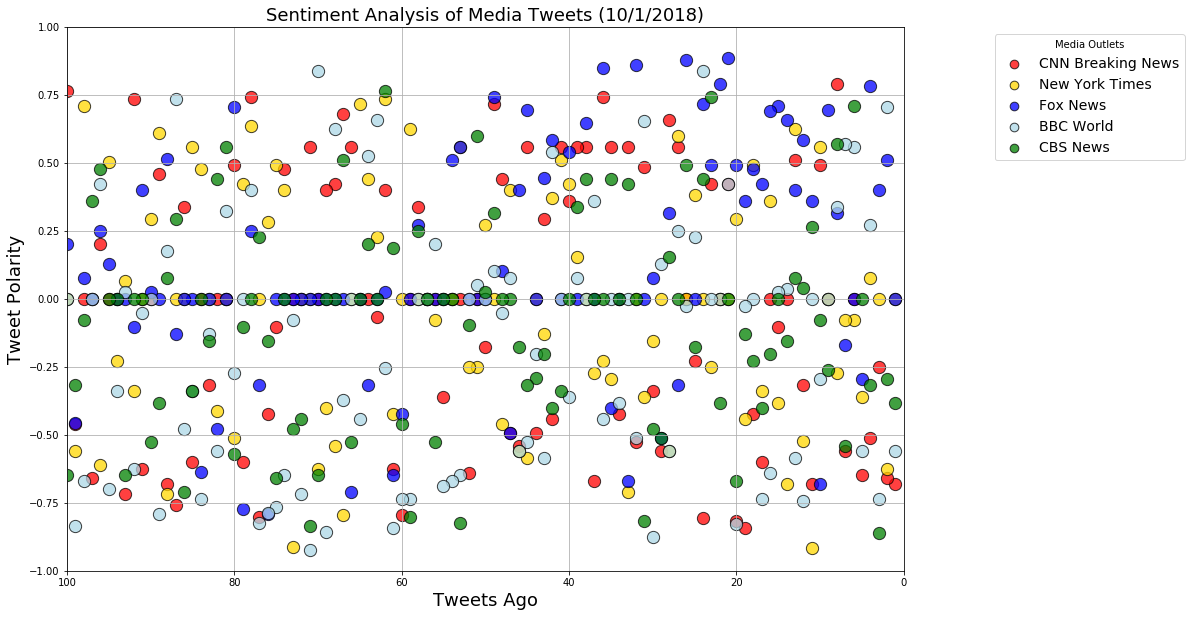

In [16]:
# figure size
plt.figure(figsize = (15,10))

cnn_scat = plt.scatter(cnnbrk_df["Tweets Ago"], cnnbrk_df["Compound"],color="red", s=150, edgecolors="black",alpha=0.75,label="CNN Breaking News")
nyt_scat = plt.scatter(nytimes_df["Tweets Ago"], nytimes_df["Compound"],color="gold", s=150, edgecolors="black",alpha=0.75,label="New York Times")
fox_scat = plt.scatter(fox_df["Tweets Ago"], fox_df["Compound"],color="blue", s=150, edgecolors="black",alpha=0.75,label="Fox News")
bbc_scat = plt.scatter(bbcbreaking_df["Tweets Ago"], bbcbreaking_df["Compound"], s=150, color="lightblue", edgecolors="black",alpha=0.75,label="BBC World")
cbs_scat = plt.scatter(cbsnews_df["Tweets Ago"], cbsnews_df["Compound"], s=150,color="green", edgecolors="black",alpha=0.75,label="CBS News")


# Set the x and y limits
plt.xlim(100, 0)
plt.ylim(-1, 1)


# Add labels to the x and y axes
plt.title(f"Sentiment Analysis of Media Tweets (10/1/2018)",fontdict = {'fontsize': 18})
plt.xlabel("Tweets Ago",fontdict = {'fontsize': 18})
plt.ylabel("Tweet Polarity",fontdict = {'fontsize': 18})


# Set a grid on plot and format legend
plt.grid()

# set up list for including plot legend when saving image/figure
legend_list = []

#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
lgnd = plt.legend(bbox_to_anchor=(1.1,1),loc="best", scatterpoints=1, fontsize=14, title="Media Outlets")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.legendHandles[3]._sizes = [75]
lgnd.legendHandles[4]._sizes = [75]

legend_list.append(lgnd)

# Save plot image (with legend) and show
plt.savefig("NewsScatterPlot.png", legend=legend_list, bbox_inches="tight")

plt.show()


In [17]:
average_comp = news_sent_df.groupby("User")["Compound"].mean()
average_comp

User
BBCBreaking   -0.171083
CBSNews       -0.091097
FoxNews        0.125173
cnnbrk        -0.042033
nytimes       -0.026230
Name: Compound, dtype: float64

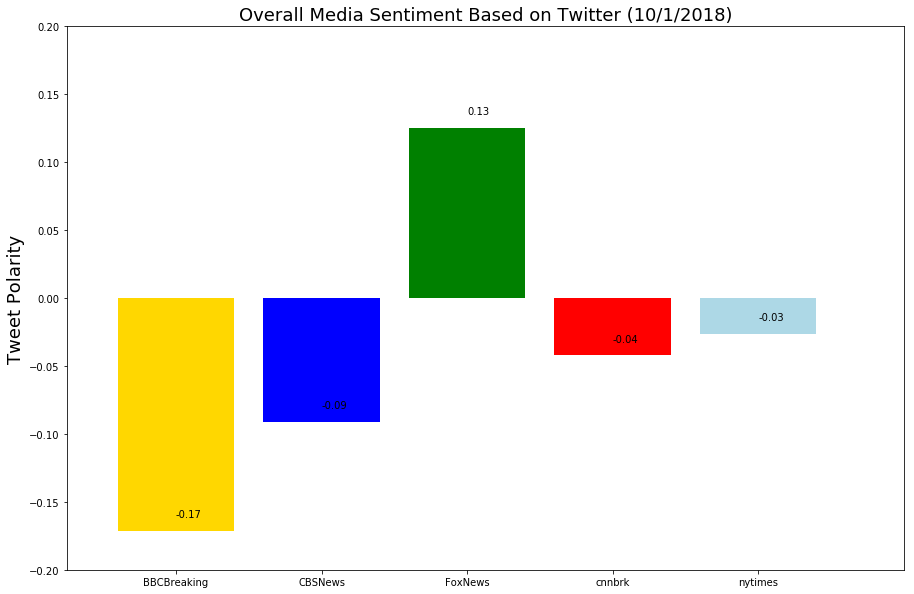

In [18]:
# figure size
plt.figure(figsize = (15,10))

x_axis = np.arange(len(average_comp))
xlabels = average_comp.index

# counter for bar labels loop
count = 0

# loop for bar labels
for comp in average_comp:
    plt.text(count, comp+.01, str(round(comp,2)))
    count = count + 1

# plot bar chart
plt.bar(x_axis, average_comp, tick_label = xlabels, color = ["gold","blue","green","red","lightblue"])

# Set the limits of the x axis
plt.xlim(-.75, len(x_axis))
# Set the limits of the y axis
plt.ylim(-.2, .2)


#Set title, x axis label, and y axis label.
plt.title(f"Overall Media Sentiment Based on Twitter (10/1/2018)",fontdict = {'fontsize': 18})
plt.ylabel("Tweet Polarity",fontdict = {'fontsize': 18})

# Save plot image and show
plt.savefig("NewsBarChart.png")
plt.show()